# Presentation de la librairie ordonnancement : utilisateur.

In [1]:
from ordonnancement import *
from pendulum import duration, datetime
from rich import print, table

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 5)

## Module `probleme`

Ce module est principalement dédié a la représentation d'un problème d'ordonnancement à prérequis composé.

Il est composé de 4 classes.

### Classe Duree

Comme son nom l'indique, cette classe représente une durée. La durée peut-être comprise de :
- D'aucune durée 
- de secondes
- de minutes
- d'heures
- de jours
- de semaines
- de mois
- d'années

Voici quelques exemples:

In [3]:
Duree(secondes=23)

Duree(secondes=23)

In [4]:
Duree(annees =22, minutes=56)

Duree(annees=22, minutes=56)

Nous pouvons aussi indiquer aucune durée :

In [5]:
Duree()

Duree(Aucune durée)

Nous avons un constructeur alternatif pour créer un objet Duree.

Voici quelques exemples:

In [6]:
Duree.par_str("13 minutes + 67 heures + 45 secondes")

Duree(heures=67, minutes=13, secondes=45)

In [7]:
Duree.par_str('2 secondes')

Duree(secondes=2)

Cette classe est supervisée par l'objet **Duration** de **Pendulum**. Nous pouvons donc convertir un objet **Duree** en objet **Duration** et inversement.

In [8]:
duree_test=Duree.par_str('2 secondes')

In [9]:
duree_test._convertit_duration()

Duration(seconds=2)

In [10]:
Duree._convertit_duree(duration(seconds=34))

Duree(secondes=34)

**Attention** La convertion d'un objet **Duration** à un objet **Duree** n'est pas optimal. Cette fonction transmet que la durée en terme de jours. Elle renvoie aussi 'le reste'. C'est à dire les secondes, minutes et heures. 

In [11]:
Duree._convertit_duree(duration(years=3, seconds=23))

Duree(jours=1095, secondes=23)

Nous pouvons effectuer des opérations entre durées grâce à 3 méthodes :

In [12]:
Duree(secondes=3)+ Duree(secondes=47)

Duree(secondes=50)

In [13]:
Duree(secondes=3).add(Duree(secondes=47))

Duree(secondes=50)

In [14]:
Duree(secondes=47)-Duree(secondes=3)

Duree(secondes=44)

La méthode `.add` est identique à l'addition.

Nous avons aussi des tests logiques entre **Duree**.

In [15]:
Duree(secondes=120)==Duree(minutes=2)

True

In [16]:
Duree(secondes=34)>=Duree(secondes=1)

True

In [17]:
Duree(secondes=34)<=Duree(secondes=1)

False

La classe durée gére certaines erreurs :
- Si les durées ne sont pas négatives.

### Classe Prerequis 

Elle représente un prérequis. Un prérequis est composé de :

- d'un nom de tâche
- d'un type : 'fin' ou 'debut'
- d'une latence exprimée par l'objet **Duree**

Voici quelques exemples :

In [18]:
Prerequis(nom="A", typ="debut", latence=Duree(secondes=34))

Prerequis(nom='A', typ='debut', latence=Duree(secondes=34))

Ici une certaine tâche doit attendre que la tâche A débute + 34 secondes

In [19]:
Prerequis(nom="G", typ="fin", latence=Duree(annees=1))

Prerequis(nom='G', typ='fin', latence=Duree(annees=1))

Ici une certaine tâche doit attendre que la tâche G finisse + 1 annees

Nous pouvons bien-sûr ne pas avoir de latence

In [20]:
Prerequis(nom="G", typ="fin", latence=Duree())

Prerequis(nom='G', typ='fin', latence=Duree(Aucune durée))


Nous avons aussi un constructeur alternatif pour cette classe.

In [21]:
Prerequis.par_str("G fin (2 annees + 8 jours)")

Prerequis(nom='G', typ='fin', latence=Duree(annees=2, jours=8))

### Classe Tache

Un objet **Tache** est composée de 
- un nom de tâche. Il faut mettre un nom sans espace.
- d'une durée non nul. Un objet **Duree**.
- d'une liste de prérequis. Plusieurs, une ou aucun objets **Prerequis**. 
- D'une correspondance : une nature associée à la tâche. Si vous ne renseignez rien, elle sera remplacé par un espace.

Voici quelques exemples.

In [22]:
a=Tache(
    nom="A", 
    duree=Duree(semaines=1), 
    prerequis=[], 
    correspondance="Créer la librairie"
       )
print(a)

In [23]:
b=Tache(
    nom="B", 
    duree=Duree(heures=1), 
    prerequis=[
        Prerequis(nom="A", typ="fin", latence=Duree())
    ], 
    correspondance="Expliquer aux utilisateurs"
)
print(b)

In [24]:
c=Tache(
    nom="C", 
    duree=Duree(secondes=34), 
    prerequis=[
        Prerequis(nom="A", typ="fin", latence=Duree(jours=3)),
        Prerequis(nom="B", typ="debut", latence=Duree(heures=2, minutes=56))
    ], 
    correspondance="Mettre en ligne la librairie"
)
print(c)

Cette classe gére ces erreurs :

- Des prérequis identiques au niveau de leur nom.
- Avoir une durée de tâche nulle.

### Classe Probleme

Cette classe représente l'entièreté du problème d'ordonnancement.

Elle est composée d'une liste d'objet **Tache**.

In [25]:
mon_probleme=Probleme(taches=[a,b,c])
print(mon_probleme)

Nous pouvons récupérer une tâche par son nom, grâce au collecteur [ ].

In [26]:
mon_probleme["A"]

Tache(nom='A', duree=Duree(semaines=1), prerequis=[], correspondance='Créer la librairie')

Nous pouvons itérer sur les noms de tâches, les tâches et sur les correspondances

In [27]:
for nom in mon_probleme.noms:
    print(nom)

In [28]:
for tache in mon_probleme.taches:
    print(tache)

In [29]:
for corr in mon_probleme.correspondances:
    print(corr)

Le test logique d'égalité ne teste pas l'identité de python.

In [30]:
probleme_bis=Probleme(taches=[a,b])
probleme_bis==mon_probleme

False

In [31]:
probleme_bis=Probleme(taches=[a,c,b])
probleme_bis==mon_probleme

True

Nous avons aussi un constructeur alternatif pour la classe **Probleme** qui doit être construit comme cela :

"**nom tache / duree de tache / prerequis | prerequis | ... / correspondance**"

Les prerequis sont optionnels et la construction des prerequis est la même que le constructeur alternatif pour l'objet **Prerequis**

In [32]:
mon_probleme_bis=Probleme.par_str("""
A / 1 semaine / /Créer la librairie
B / 1 heure / A fin /Expliquer aux utilisateurs
C / 34 secondes / A fin (3 jours) | B debut (2 heures + 56 minutes) / Mettre en ligne la librairie""")

In [33]:
mon_probleme==mon_probleme_bis

True

Nous avons conscience que l'affichage d'un problème n'est pas sympathique. Nous pouvons afficher notre problème dans un tableau depuis la fonction `affiche_probleme`

In [34]:
mon_probleme.affiche_probleme()

Nous pouvons rajouter l'argument `entier=True` pour ajouter les correspondances/natures des tâches

In [35]:
mon_probleme.affiche_probleme(entier=True)

Nous avons aussi l'argument `brute=True`. C'est à dire qu'il affiche des durées non retravaillées.

In [36]:
mon_probleme_exemple_brute=Probleme.par_str("""
A / 1847 semaine / /Créer la librairie
B / 172367 heure / A fin /Expliquer aux utilisateurs
C / 35780 secondes / A fin (1900 jours) | B debut (35 heures + 455 minutes) / Mettre en ligne la librairie""")

In [37]:
mon_probleme_exemple_brute.affiche_probleme()
mon_probleme_exemple_brute.affiche_probleme(brute=True)

**Attention** Lorsque des secondes, heures, minutes, jours et semaines sont renseignées, il ne les retravaille pas en mois et années. Nous perdons en précisions sinon.

Nous pouvons aussi afficher un tableau des noms de tâche et leurs natures/correspondances

In [38]:
mon_probleme.affiche_correspondance()

Cette classe gére les erreurs :

- Ne pas avoir des tâches identiques du point de vue de leurs noms.

## Module `algorithme`

Ce module contient l'algorithme de résolution du problème d'ordonnancement

À vrai dire, il en contient deux :
- L'un en sortira des durées sous forme d'un emploi du temps
- L'autre en sortira des dates sous forme d'un calendrier.

### L'algorithme en durée

Il est réalisé par la fonction `resous_EDT(mon_probleme)`. Il ressortira un objet **EDT**, que l'on expliquera plus tard.
En voici un exemple.

In [39]:
print(resous_EDT(mon_probleme))
resous_EDT(mon_probleme).affiche()

Nous pouvons rajouter des conditions comme une durée d'éxécution journalière de tâches ou des jours hebdomadaire de repos.

In [40]:
resous_EDT(mon_probleme, duree_max_journalier=12, nb_jours_repos=2).affiche()

**Attention** : nous perdons en précisions avec ces arguments.
En général:
- Le fait de rajouter un nb de jours de repos *sous-estime*
- Le fait de rajouter une duree d'éxécution journalière *sur-estime*

### L'algorithme en date

Il est réalisé par la fonction `resous_Calendrier(mon_probleme)`. Il ressortira un objet **Calendrier**, que l'on expliquera plus tard.

Nous devons renseigner une date de commencement d'éxécution de tâche. Il peut-être de type **Date** ou il peut-être construit avec une structure particulière.
En voici un exemple.

In [41]:
print(resous_Calendrier(mon_probleme, date_commencement="12/01/2013/19:00:30"))
resous_Calendrier(mon_probleme, date_commencement="12/01/2013").affiche()

Nous pouvons aussi rajouter les mêmes conditions que l'algorithme en durée :

- `jours_repos` : le nom des jours de repos.
- `heures_execution` : la plage horaire d'éxécution de tâche.

In [42]:
resous_Calendrier(mon_probleme, date_commencement="12/01/2013", jours_repos="Mardi mercredi", heures_execution="09-22").affiche()

Il faut savoir que ces conditions ont été rajouté si nous avons ajouté des durées en brute.

C'est à dire qu'une tâche prend vraiment 3 jours (donc 72heures) d'éxécution, au lieu de 3 jours de travail en ayant déja compris le fait qu'une journée de travail faisait $X$ heures.

Ces algorithmes gèrent certaines erreurs :
- Si le nombre de jours de repos est égal à une semaine.
- Si la durée d'éxécution journalière est négative.
- Si le problème a une solution.

## Le module `edt`

Ce module contient l'emploi du temps créé à partir de l'algorithme de résolution.

### L'objet Activite

Il représente une acitivté. Il contient :
- Un objet **Tache**.
- Une durée de début
- Une durée de fin

En voici un petit exemple :

In [43]:
resolution_en_edt=resous_EDT(mon_probleme)

In [44]:
print(resolution_en_edt["A"])

Il gère certaines erreurs :
- Si la durée de fin moins la durée de début est égale à la durée du prérequis
- Si la durée de début est inférieure a la durée de fin

### L'objet `EDT`

Il contient une liste d'objet `Activite`.

Voici un exemple

In [45]:
print(resolution_en_edt)

Nous pouvons ajouter au fur et à mesure des activités

In [46]:
edt_test=EDT(activites=[])
print(edt_test)

In [47]:
edt_test.ajoute(resolution_en_edt["A"])

In [48]:
print(edt_test)

In [49]:
edt_test.ajoute(resolution_en_edt["B"])
edt_test.ajoute(resolution_en_edt["C"])
edt_test==resolution_en_edt

True

Nous pouvons regarder si un emploi du temps est valide c'est à dire s'il respecte les contraintes telles que la durée de fin est supérieure à la durée de début

In [50]:
edt_test.est_valide()

True

Nous avons créé un affichage un peu plus plaisant pour représenter un emploi du temps.

In [51]:
edt_test.affiche()

Nous pouvons rajouter l'argument `entier=True` pour ajouter les correspondances.

In [52]:
edt_test.affiche(entier=True)

**A affiner** :
Nous pouvons aussi avoir une visualisation de notre calendrier.

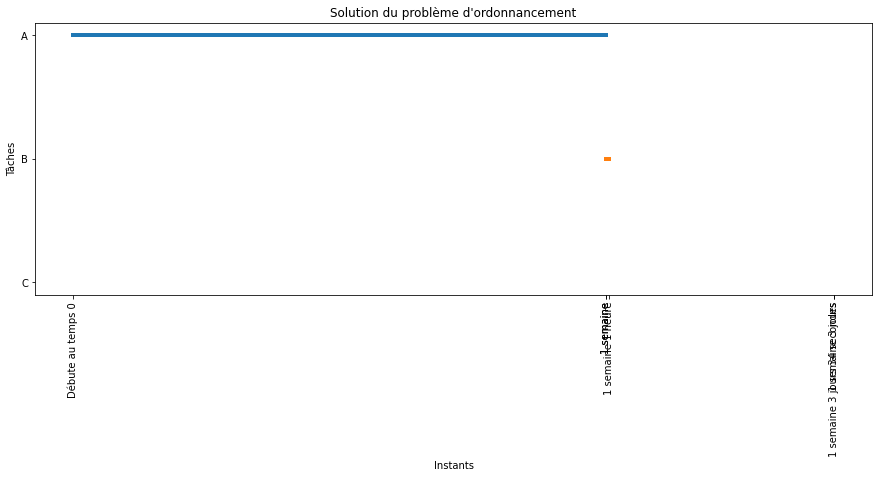

In [53]:
edt_test.genere_graphique()

## Le module `calendrier`

Ce module contient les classes **Date**, **Datation** et **Calendrier**.

### L'objet Date

Il représente une date et peut aussi représenter une heure.
Voici quelques exemples :

In [54]:
Date(jours=23, mois=12, annees=1990)

Date(jours=23, mois=12, annees=1990)

In [55]:
Date(jours=23, mois=12, annees=1990, heures=23)

Date(jours=23, mois=12, annees=1990, heures=23, minutes=0, secondes=0)

Cet objet est supervisé par l'objet **Datetime** de **Pendulum**.

Nous pouvons donc convertir un objet **Datetime** vers un objet **Date** et inversement.

In [56]:
date_test=Date(jours=23, mois=12, annees=1990)
date_test._convertit_datetime()

DateTime(1990, 12, 23, 0, 0, 0, tzinfo=Timezone('UTC'))

In [57]:
Date._convertit_date(datetime(day=23, month=12, year=1990))

Date(jours=23, mois=12, annees=1990)

In [58]:
Date._convertit_date(datetime(day=23, month=12, year=1990))==date_test

True

Nous pouvons aussi ajouter ou additionner ou soustraire une durée à cet objet.

In [59]:
duree=Duree(annees=2)

In [60]:
date_test.add(duree)

Date(jours=23, mois=12, annees=1992)

In [61]:
date_test + duree

Date(jours=23, mois=12, annees=1992)

In [62]:
date_test - duree

Date(jours=23, mois=12, annees=1988)

Nous pouvons aussi faire des tests logiques sur ces dates

In [63]:
Date(jours=23, mois=12, annees=1992) < Date(jours=10, mois=12, annees=1998)

True

In [64]:
Date(jours=23, mois=12, annees=1992) > Date(jours=23, mois=12, annees=1999)

False

In [65]:
Date(jours=23, mois=12, annees=1992) == Date(jours=23, mois=12, annees=1998)

False

Nous avons un constructeur alternatif pour cette classe.

In [66]:
Date.par_str("23/12/1998")

Date(jours=23, mois=12, annees=1998)

In [67]:
Date.par_str("23/12/1998/23:12")

Date(jours=23, mois=12, annees=1998, heures=23, minutes=12, secondes=0)

In [68]:
Date.par_str("23/12/1998/23:12:09")

Date(jours=23, mois=12, annees=1998, heures=23, minutes=12, secondes=9)

Une date peut-être construite sous certaines conditions :

- Que la valeur de mois, jours, et annees soit égale ou supérieur à 1
- Que le mois ne dépasse pas 12, que le jour dépasse pas 31
- Que le numéro du jour existe dans le mois.
- Que les secondes et minutes soient comprises entre 0 et 59.
- Que les heures soit comprises entre 0 et 23.

### L'objet Datation

Elle représente une datation pour une tâche.
Elle est composée :
- D'un objet **Tache**
- D'une date de debut
- D'une date de fin

Voici un exemple :

In [69]:
resolution_en_cal=resous_Calendrier(mon_probleme, date_commencement="23/12/1998")

In [70]:
print(resolution_en_cal["A"])

Elle est sensiblement identique à l'objet **Activite**.

Elle gère le fait :
- Que la date de debut soit inférieure à la date de fin
- Que la date de fin soit égale à la date de début plus la durée de la tâche

### L'objet Calendrier
Elle résulte de l'algorithme de résolution en date.

Elle comprend une liste DE DATATIONS.

Voici un exemple :

In [71]:
print(resolution_en_cal)

L'affichage peut-être un peu lourd. Pour palier à cela, nous pouvons afficher le calendrier en mode tableau.

In [72]:
resolution_en_cal.affiche()

Nous pouvons rajouter l'argument `entier=True` pour pouvoir afficher les correspondances.

In [73]:
resolution_en_cal.affiche(entier=True)

Cette affichage gére de manière intelligente les dates. En effet, si nous avons aucune date comprenant des heures, minutes ou secondes, il n'affichera que la date. 
Au contraire si nous avons des dates comprenant seulement des heures et minutes, il affichera que la date avec l'heure sans les secondes. Et enfin, si une date contient des secondes, il affichera la totalité de la date.

Nous pouvons rajouter à postériori des activités.

In [74]:
calendrier_test=Calendrier(dates=[])

In [75]:
calendrier_test.ajoute(resolution_en_cal["A"])

In [76]:
print(calendrier_test)

In [77]:
calendrier_test.ajoute(resolution_en_cal["B"])
calendrier_test.ajoute(resolution_en_cal["C"])

In [78]:
calendrier_test==resolution_en_cal

True

Nous pouvons vérifier si le calendrier est valide. C'est à dire s'il respecte les contraintes :
- la date de fin doit être supérieure à la date de debut
- la date de fin doit-être égal à la date de debut plus la durée de la tâche.

In [79]:
calendrier_test.est_valide()

True

**A affiner** :
Nous pouvons aussi avoir une visualisation de notre calendrier.

<AxesSubplot:title={'center':"Solution du problème d'ordonnancement"}, xlabel='Dates', ylabel='Tâches'>

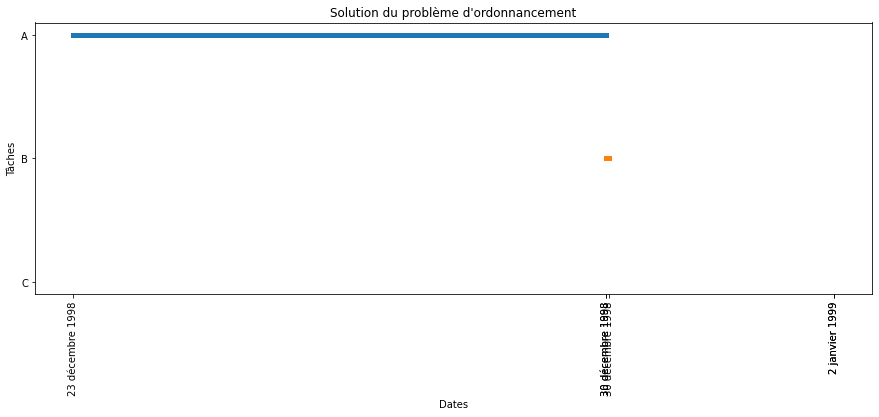

In [80]:
calendrier_test.genere_graphique()

## Points à améliorer et faiblesses

Lorsque nous rajoutons une durée quotidienne d'éxécution de tâche ou lorsque nous rajoutons des jours hebdomadaire de repos, nous perdons en précisions. Il serait important d'étailler ce problème.

Il serait aussi pertinent de rajouter plusieurs durées quotidiennes d'éxécution de tâche.

Nous pourrions aussi rajouter, à l'algorithme de résolution, des dates pour lesquelles l'éxécution de tâche est impossible. Je pense entre autre aux jours fériées. 

Un developpement complet des objet Duree et Date pour pouvoir fournir un spectre plus large d'utilisation de ces classes. 

Je n'ai notamment pas réussi à itérer sur les instances des objets Date et Duree. 

Un code plus clair et plus efficaces. En effet, je trouve que mon code est un peu trop primitif et pas assez explicite. 

Développement d'un app.py

# Résolution d'un probléme général 

Nous allons résoudre un problème d'ordonnancement pour le montage d'un film.

Un producteur de cinéma est confronté au problème du planning de son prochain film et vous soumet les tâches qui doivent être effectuées :

|Tâche | Nature                    | Durée (Jours)| Prérequis (au plus tôt)|
|------|---------------------------|--------------|------------------------|
|  A   | Ecriture du scénario      | 30           | -                      |
|  B   | Casting                   | 12           | fin A + 15j            |
|  C   | Choix du lieu de tournage | 8            | fin A + 20j            |
|  D   | Découpage technique       | 4            | A et C finies          |
|  E   | Décors                    | 7            | C et D finies          |
|  F   | Tournages extérieurs      | 10           | A,B,C et D finies      |
|  G   | Tournages intérieurs      | 12           | D, E et F finies       |
|  H   | Synchronisation           | 3            | F et G finies          |
|  I   | Montage                   | 14           | H finie                |
|  J   | Son                       | 7            | debut I + 3j et fin H  |
|  K   | Mixage                    | 6            | I et J finies          |
|  L   | Tirage                    | 1            | fin K + 2j             |

Proposer un planning optimal au  producteur.

In [81]:
probleme_general=Probleme.par_str("""
A / 30 jours // Ecriture du scénario
B / 12 jours / A fin (15 jours) / Casting
C / 8 jours / A fin (20 jours) / Choix du lieu de tournage
D / 4 jours / A fin | C fin / Découpage technique
E / 7 jours / C fin | D fin / Décors
F / 10 jours / A fin | B fin | C fin | D fin / Tournages extérieurs
G / 12 jours / D fin | E fin | F fin / Tournages intérieurs
H / 3 jours / F fin | G fin / Synchronisation
I / 14 jours / H fin / Montage
J / 7 jours / I debut (3 jours) | H fin / Son
K / 6 jours / I fin | J fin / Mixage
L / 1 jour / K fin (2 jours) /Tirage
""")

In [82]:
probleme_general.affiche_probleme(entier=True)

## Resolution en durée

In [83]:
resolution=resous_EDT(probleme_general)
resolution.affiche(entier=True, brute=True)

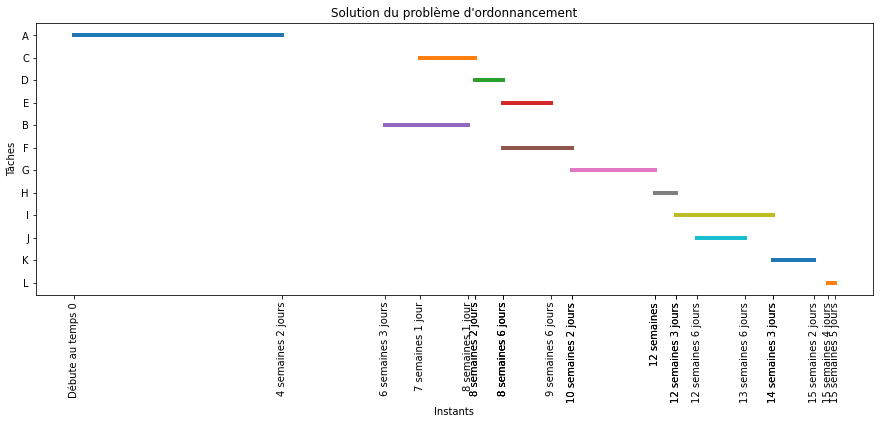

In [84]:
resolution.genere_graphique()

## Resolution en date

In [85]:
resolution=resous_Calendrier(probleme_general, date_commencement="09/04/2021", jours_repos="Mardi Mercredi")
resolution.affiche(entier=True)

<AxesSubplot:title={'center':"Solution du problème d'ordonnancement"}, xlabel='Dates', ylabel='Tâches'>

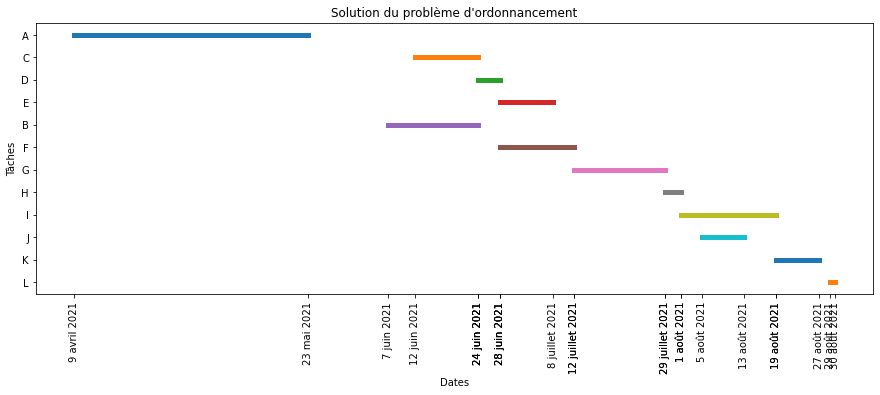

In [86]:
resolution.genere_graphique() 

## GUI

Voici l'application interface utilisateur.

In [87]:
from app import Application

In [88]:
mon_application = Application()

In [89]:
mon_application.affichage()

Output()

## pytest-cov

Voici l'état de couverture de mes tests.

In [90]:
message="""----------- coverage: platform win32, python 3.8.5-final-0 -----------
Name                           Stmts   Miss  Cover
--------------------------------------------------
ordonnancement\__init__.py         6      0   100%
ordonnancement\algorithme.py     162     39    76%
ordonnancement\calendrier.py     243     62    74%
ordonnancement\edt.py             83     35    58%
ordonnancement\probleme.py       324     94    71%
test_algorithme.py                74      9    88%
test_calendrier.py               201      9    96%
test_edt.py                       56      2    96%
test_probleme.py                 134      6    96%
--------------------------------------------------
TOTAL                           1283    256    80%"""
print(message)

## Format du code

Nous avons formater notre code en standard industriel grâce au package **Black**